In [4]:
import pandas as pd
import matplotlib as plt
import re

cache_sizes = [64, 8 * 1024, 16 * 1024, 32 * 1024, 64 * 1024]

%matplotlib inline

In [5]:
def read_stats(stat):
    values = []
    
    for size in cache_sizes:
        with open(f"/home/nivetha/5SIA0-ECA-Assignments/eeg/2.2/{size}/stats.txt") as f:
            line = f.readline()
            while line:
                line = re.sub(r"\s+#.*$", "", line)
                if re.match(stat, line):
                    value = float(re.split(r"\s+", line)[1])
                    values.append(value)
                line = f.readline()
                
    return pd.Series(list(values), name=stat)

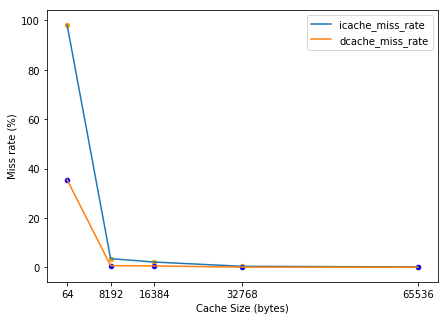

In [6]:
# Cache size vs cache miss rate
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
icache_overall_miss_rates = read_stats("system.cpu.icache.overall_miss_rate::total").rename("icache_miss_rate")
dcache_overall_miss_rates = read_stats("system.cpu.dcache.overall_miss_rate::total").rename("dcache_miss_rate")

df = pd.concat([cache_sizes_series, icache_overall_miss_rates, dcache_overall_miss_rates], axis=1)

df.dcache_miss_rate = df.dcache_miss_rate.apply(lambda x: x * 100)
df.icache_miss_rate = df.icache_miss_rate.apply(lambda x: x * 100)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))
df.plot(kind='scatter', x='cache_size', y='icache_miss_rate', c='orange', ax=ax)
df.plot(kind='scatter', x='cache_size', y='dcache_miss_rate', c='blue', ax=ax)

ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Miss rate (%)')
ax.set_xticks(df.cache_size)

<class 'pandas.core.series.Series'>


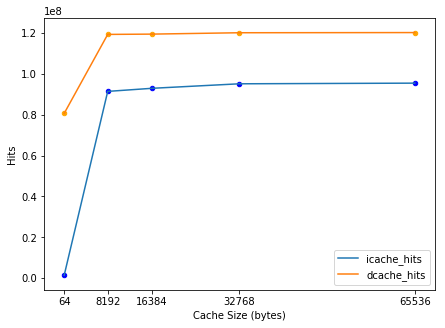

In [9]:
# Cache size vs hits
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
icache_overall_hits = read_stats("system.cpu.icache.overall_hits::total").rename("icache_hits")
dcache_overall_hits = read_stats("system.cpu.dcache.overall_hits::total").rename("dcache_hits")

df = pd.concat([cache_sizes_series, icache_overall_hits, dcache_overall_hits], axis=1)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))
df.plot(kind='scatter', x='cache_size', y='icache_hits', c='blue', ax=ax)
df.plot(kind='scatter', x='cache_size', y='dcache_hits', c='orange', ax=ax)

ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Hits')
ax.set_xticks(df.cache_size)

In [ ]:
# Cache size vs simulation seconds
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
simulation_time = read_stats("sim_seconds").rename("simulation_time")
# dcache_overall_hits = read_stats("system.cpu.dcache.overall_hits::total").rename("dcache_hits")

df = pd.concat([cache_sizes_series, simulation_time], axis=1)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))
df.plot(kind='scatter', x='cache_size', y='simulation_time', c='blue', ax=ax)


ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.cache_size)